In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np

import dataset for training 


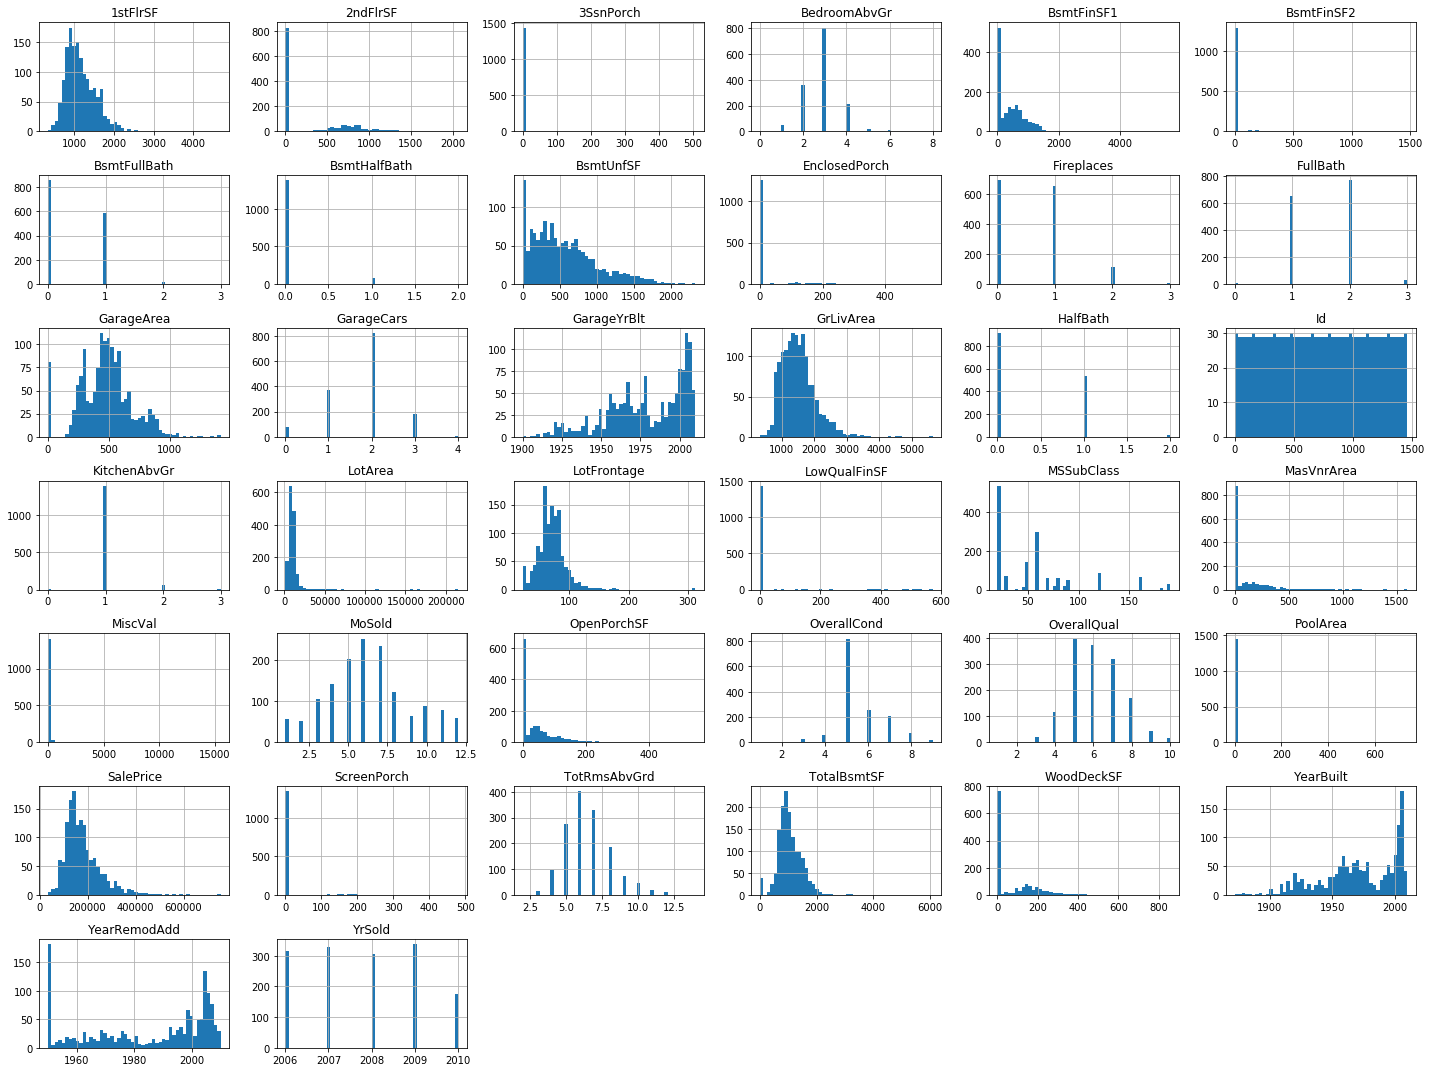

In [2]:
train_file_path = 'input/train.csv'
test_file_path = 'input/test.csv'
house_whole_data = pd.read_csv(train_file_path)
test_whole_data = pd.read_csv(test_file_path)
house_whole_data.hist(bins = 50, figsize = (20,15))
plt.tight_layout()
plt.show()



In [15]:
# split dataset
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (house_whole_data, test_size = 0.2, random_state = 42)
house_data = train_set.copy()
#house_data = house_whole_data.copy()
house_data_test = test_set.copy()
#house_data_test = test_whole_data.copy()
house_data = house_data.drop(["SalePrice", "Id"], axis = 1)
house_data_test = house_data_test.drop(["SalePrice","Id"], axis = 1)
house_data.columns.difference(house_data_test.columns)

Index([], dtype='object')

In [4]:
# go through all the features, check for those that are not listed on histogram

house_data.info()
# columns to clean
#  object: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig,LandSlope, Neighborhood,Condition1,Condition2,BldgType, HouseStyle,RoofStyle,RoofMatl,Exterior1st,
#        Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure,BsmtFinType1,BsmtFinType2   
#        Heating, CentralAir, Electrical,KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, PavedDrive 
#        PoolQC, Fence, MiscFeature
#  Missing Data: LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType2,Electrical,FireplaceQu,
#               GarageType,GarageYrBlt,GarageFinish, GarageQual,GarageCond, PoolQC ,Fence, MiscFeature, SaleType, SaleCondition
#  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


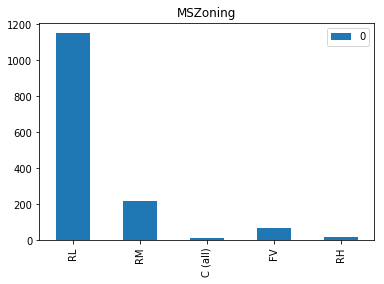

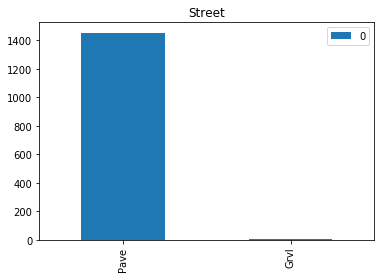

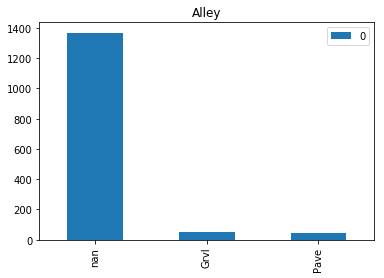

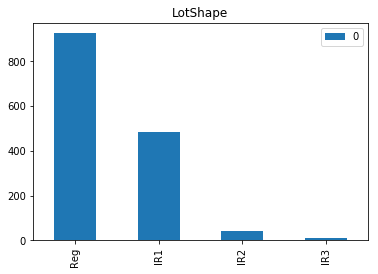

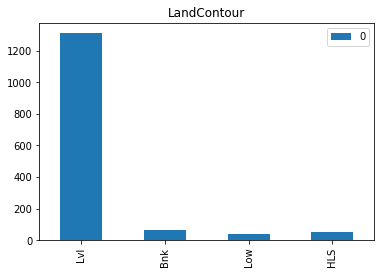

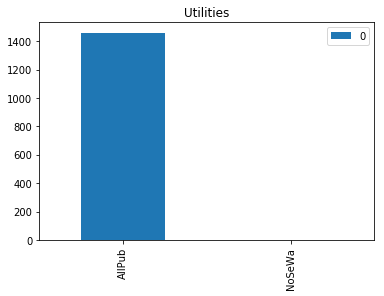

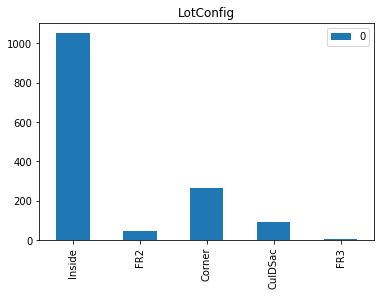

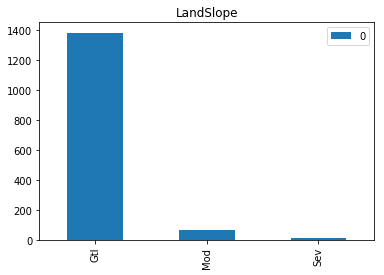

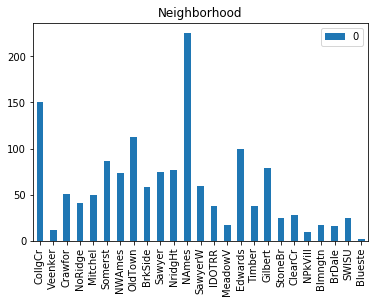

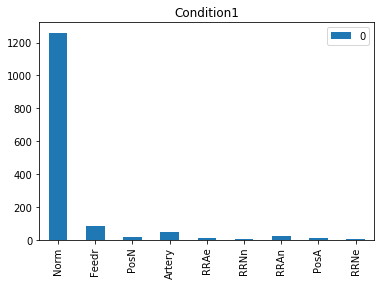

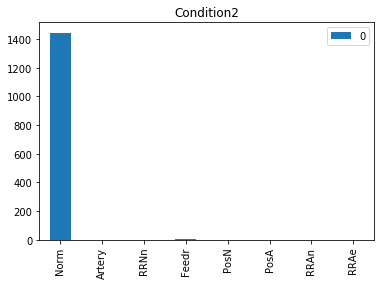

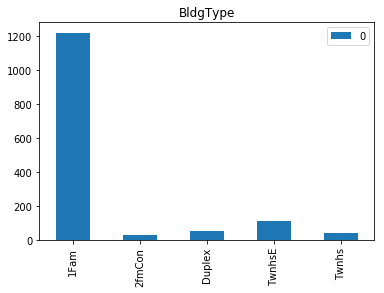

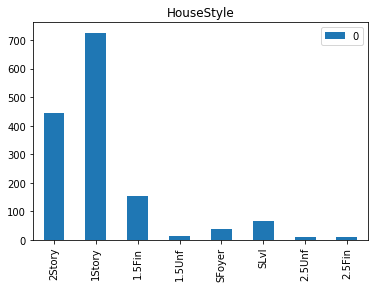

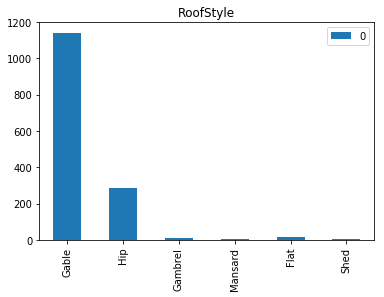

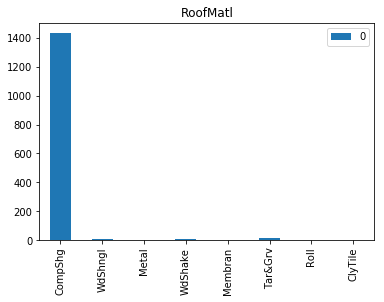

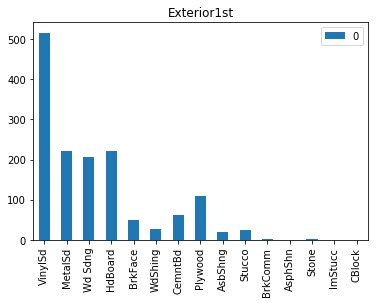

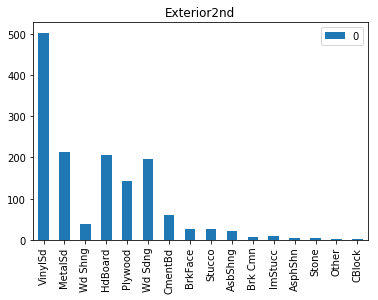

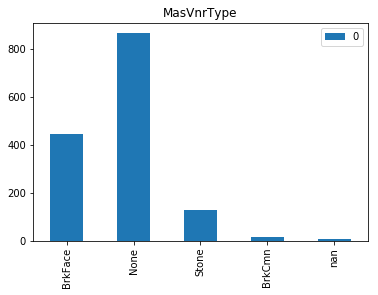

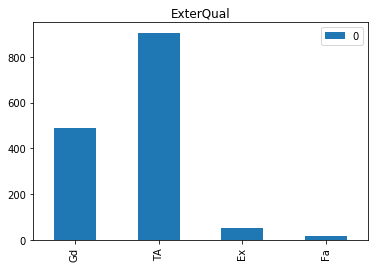

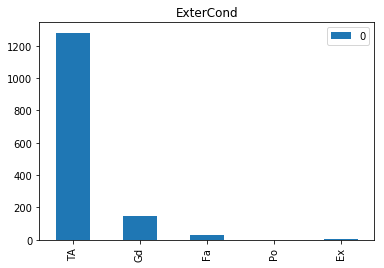

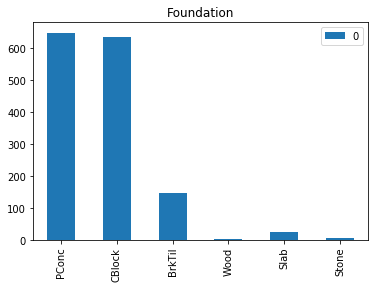

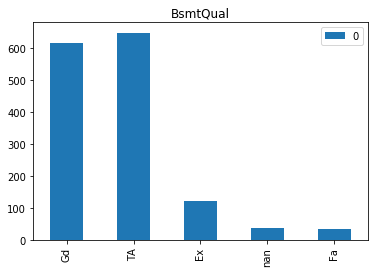

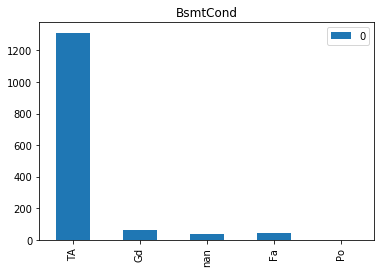

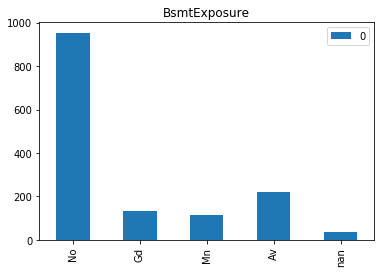

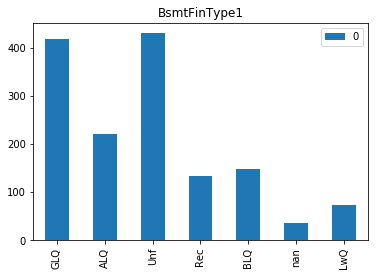

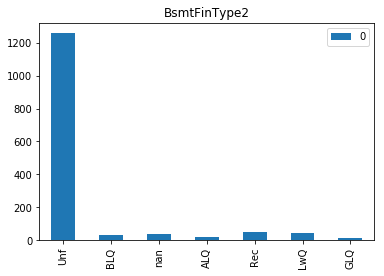

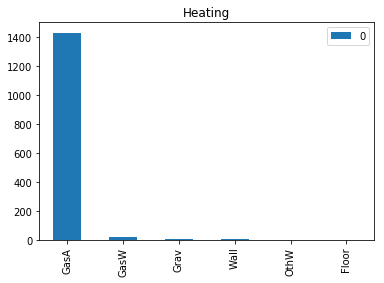

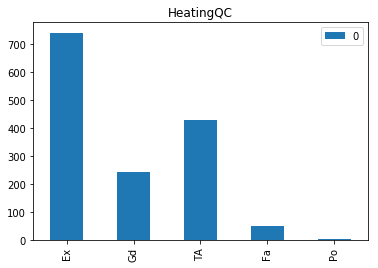

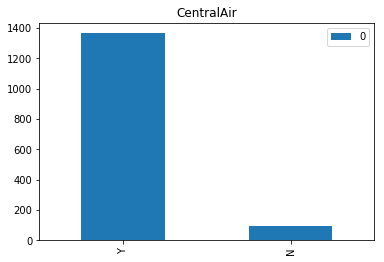

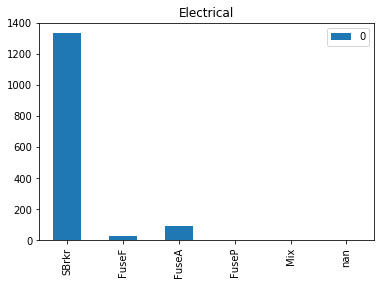

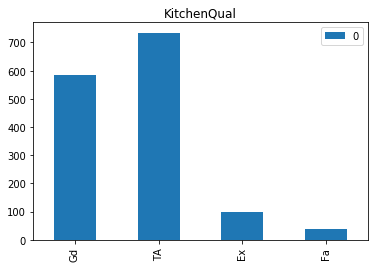

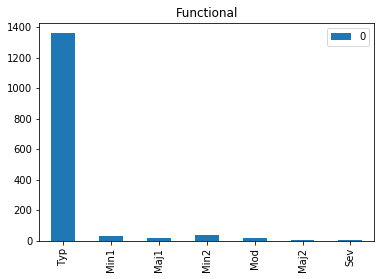

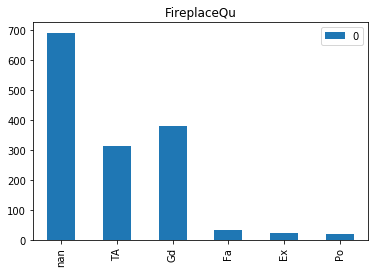

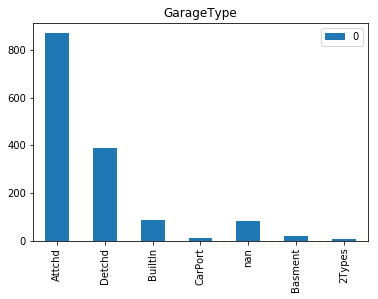

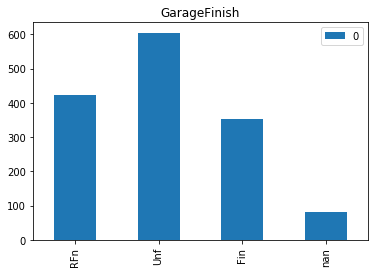

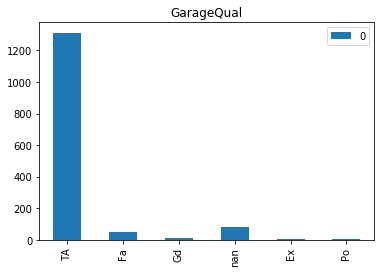

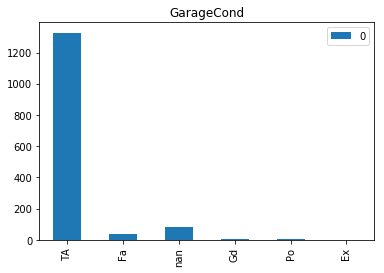

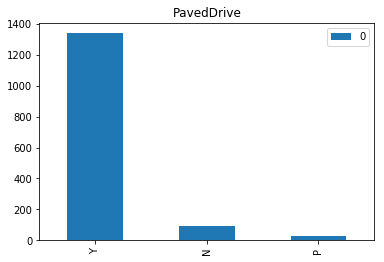

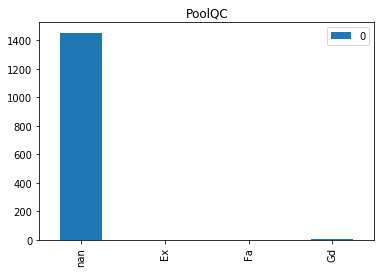

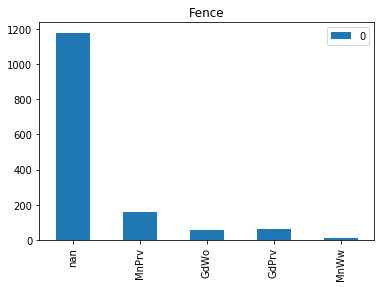

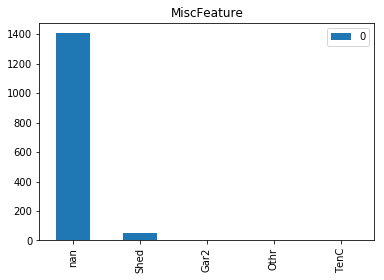

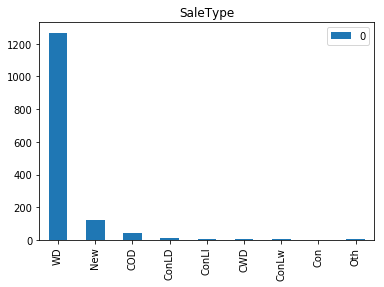

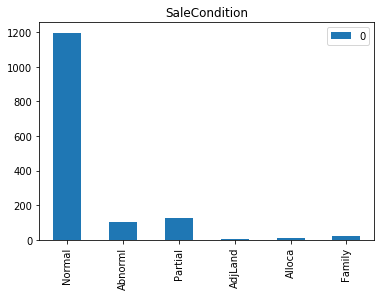

In [5]:
# write the function to plot objects feature

from collections import Counter

def plot_Objects(X, name):
    letter_counts = Counter(X)
    df = pd.DataFrame.from_dict(letter_counts, orient = 'index')
    df.plot(kind = 'bar', title = name)
    
for _eachFeature in house_data:
    if house_data[_eachFeature].dtype == object:
        plot_Objects(house_data[_eachFeature], _eachFeature)
    
        
    

In [16]:

#input median values for missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
# they are object type, we could drop them for this step
ready_to_encode_arr = [ "MSZoning", "Street","LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood","Condition1","Condition2","BldgType", "HouseStyle","RoofStyle","RoofMatl","Exterior1st",
       "Exterior2nd","ExterQual", "ExterCond", "Foundation", "BsmtFinType1","Heating", "CentralAir", "KitchenQual", "Functional",  "PavedDrive",
        "Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","HeatingQC","Electrical","FireplaceQu",
        "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"
       ]

append_ar = ["Id", "MSZoning", "Street","LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood","Condition1","Condition2","BldgType", "HouseStyle","RoofStyle","RoofMatl","Exterior1st",
       "Exterior2nd","ExterQual", "ExterCond", "Foundation", "BsmtFinType1","Heating", "CentralAir", "KitchenQual", "Functional",  "PavedDrive",
        "Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","HeatingQC","Electrical","FireplaceQu",
        "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"
       ]
#only reserve the numerical features 
house_imput = house_data.drop(ready_to_encode_arr, axis = 1)
house_imput_test =  house_data_test.drop(ready_to_encode_arr, axis = 1)

imputer.fit(house_imput)
imputer.fit(house_imput_test)

X =imputer.transform(house_imput)
X_test = imputer.transform(house_imput_test)

house_train = pd.DataFrame(X, columns = house_imput.columns, dtype=np.int64)
house_train_test = pd.DataFrame(X_test, columns = house_imput_test.columns, dtype=np.int64)

#now we have completed numerical data fields in house_train dataframe, we wanna merge it back with the remaining object columns
house_object = pd.DataFrame(house_data, columns = ready_to_encode_arr)
house_object_test = pd.DataFrame(house_data_test, columns = ready_to_encode_arr)


# new this house_new table has all the numerical data field filled, the rest are the same as the original dataset
house_new = pd.concat([house_train,house_object], axis=1,join_axes=[house_train.index])
house_new_test =  pd.concat([house_train_test,house_object_test], axis=1,join_axes=[house_train_test.index])




house_new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
MSSubClass       292 non-null int64
LotFrontage      292 non-null int64
LotArea          292 non-null int64
OverallQual      292 non-null int64
OverallCond      292 non-null int64
YearBuilt        292 non-null int64
YearRemodAdd     292 non-null int64
MasVnrArea       292 non-null int64
BsmtFinSF1       292 non-null int64
BsmtFinSF2       292 non-null int64
BsmtUnfSF        292 non-null int64
TotalBsmtSF      292 non-null int64
1stFlrSF         292 non-null int64
2ndFlrSF         292 non-null int64
LowQualFinSF     292 non-null int64
GrLivArea        292 non-null int64
BsmtFullBath     292 non-null int64
BsmtHalfBath     292 non-null int64
FullBath         292 non-null int64
HalfBath         292 non-null int64
BedroomAbvGr     292 non-null int64
KitchenAbvGr     292 non-null int64
TotRmsAbvGrd     292 non-null int64
Fireplaces       292 non-null int64
GarageYrBlt      292 non-null i

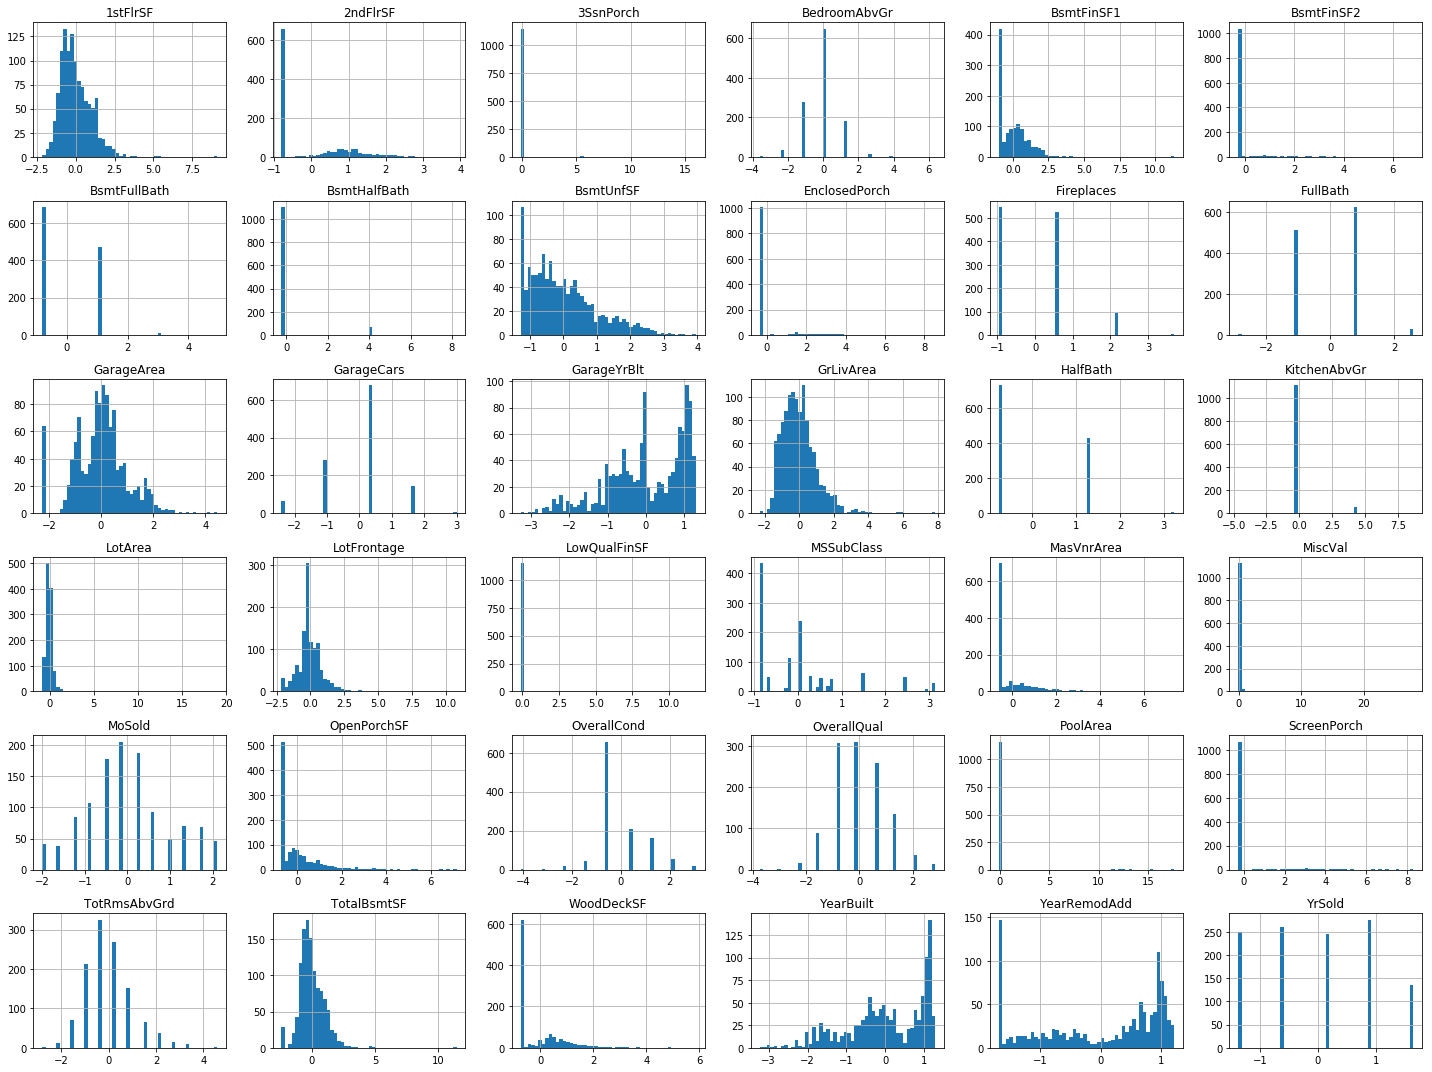

In [17]:
#standarize numerical data

def Standarize_data(X):
    mean = X.mean()
    stdev = float(X.std())
    return (X-mean)/stdev

for _eachFeature in house_new:
    if (house_new[_eachFeature].dtype) != object:
        house_new[_eachFeature] = Standarize_data(house_new[_eachFeature])
        
for _eachFeature in house_new_test:
    if (house_new_test[_eachFeature].dtype) != object:
        house_new_test[_eachFeature] = Standarize_data(house_new_test[_eachFeature])



house_new.hist(bins = 50, figsize = (20,15)) 
plt.tight_layout()
plt.show()      


In [18]:

# use pandas functionality to do one hot encoding to the house_data
# notice we make the assumption to give all the null values 0 as default, this could be tuning in the future
house_final = pd.get_dummies(house_new)
house_final_test = pd.get_dummies(house_new_test)
# confirm there is no null value
house_final.isnull().sum()

#house_final.describe()

# sklearn does not seem to work as nice as panda here, commented out
# from sklearn.preprocessing import OneHotEncoder
# def encode_feature(feature_name):
#     encoder = OneHotEncoder()
#     feature_toEncode = house_data[feature_name]
#     encoded_feature, encoded_categories = feature_toEncode.factorize()
#     feature_cat_1hot = encoder.fit_transform(encoded_feature.reshape(-1,1))
 

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
                        ..
GarageQual_TA            0
GarageCond_Ex            0
GarageCond_Fa            0
GarageCond_Gd            0
GarageCond_Po            0
GarageCond_TA            0
P

# now all the data should be filled, end of data cleaning process for our base line

In [9]:
# we wanna see the correlation matrix for each feature, this should give us some generic ideas
# corr_matrix = house_final.corr()
# corr_matrix["SalePrice"].sort_values(ascending = False)

we use xgboost as our first trial 

In [29]:
import xgboost as xgb
train_X = house_final
train_Y = train_set['SalePrice']

test_X = house_final_test
test_Y = test_set['SalePrice']

# Get missing columns in the training test
missing_cols = set( train_X.columns ) - set( test_X.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_X[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_X = test_X[train_X.columns]




In [31]:
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_byree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10, random_state = 42)
xg_reg.fit(train_X, train_Y)
preds = xg_reg.predict(test_X)
print(preds)
rmse = np.sqrt(mean_squared_error(test_Y, preds))
print("RMSE: %f" % (rmse))

[ 87418.55  197010.     89966.92  108982.734 198992.73   59525.65
 136592.47  105134.76   59525.65   84147.34  107754.6    84617.08
  69774.43  138288.7   119557.016  87710.15  130819.29   88768.086
  81727.836 146500.22  103312.6   151562.03  117049.46   80368.29
 135062.67  108734.99  125069.64   72796.33  119557.016 118130.73
  78194.39  155352.77   94149.99   80151.875 160860.17   94643.05
  78441.555 141712.6   205792.61   71258.34   85909.984 149197.81
  84748.98  215817.23   88148.75   92129.664  79697.13   84889.27
 268912.03  100072.44   77434.01  119885.18   70534.125 186962.58
  88597.836 153233.44  134227.52   99464.92  100555.3    71036.85
  57047.01   89074.375 191012.84  178792.44  172138.34  142544.05
  76660.03  213930.9    80563.7   109663.23   88724.13   91880.05
  74802.805  67045.42  137371.45  102452.94  208458.84  173612.86
  90157.266  79025.17   62988.36   62263.914  82665.516  72691.05
 109109.555  85627.53  173593.1   134083.05   88597.836 125779.65
  94918.8

first submission trial


In [12]:
print(test_whole_data.Id.dtype)
my_submission = pd.DataFrame({'Id': test_whole_data.Id, 'SalePrice': preds})
my_submission.to_csv('submission.csv', index=False)

int64
